<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка.

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов.

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [2]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [3]:
import numpy as np

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [8]:

iris_dataset_1 = np.delete(iris_dataset.data, 1, axis=1)
iris_dataset_2 = np.delete(iris_dataset.data, 0, axis=1)

print("(sepal length, petal length, petal width) - форма:", iris_dataset_1.shape)
print("(sepal width, petal length, petal width) - форма:", iris_dataset_2.shape)

(sepal length, petal length, petal width) - форма: (150, 3)
(sepal width, petal length, petal width) - форма: (150, 3)


### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [14]:
# если работаете в интерактивной оболочке IPython
% matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


In [15]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
# В Colab %matplotlib inline обычно не нужен, графики отображаются автоматически

**Пример** построения трехмерного графика

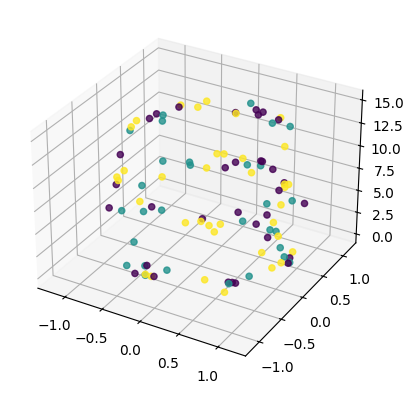

In [16]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

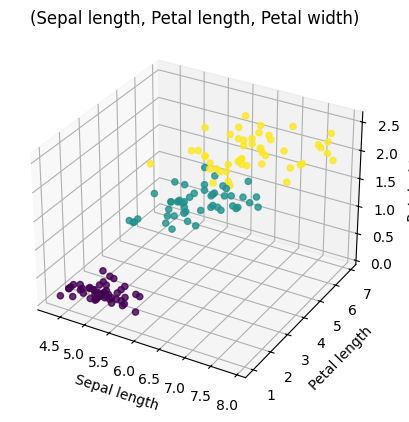

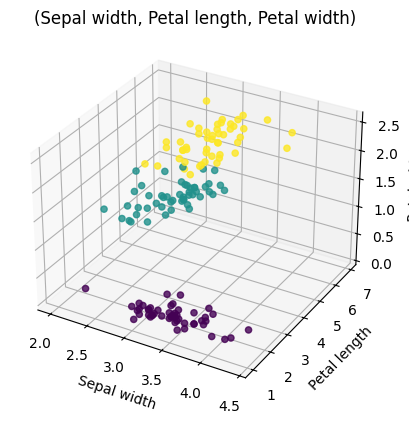

In [20]:

# Первый набор: (sepal length, petal length, petal width)
ax = plt.axes(projection='3d')
ax.scatter3D(iris_dataset_1[:, 0], iris_dataset_1[:, 1], iris_dataset_1[:, 2],
             alpha=0.8, c=iris_dataset.target)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')
ax.set_title('(Sepal length, Petal length, Petal width)')
plt.show()

# Второй набор: (sepal width, petal length, petal width)
ax = plt.axes(projection='3d')
ax.scatter3D(iris_dataset_2[:, 0], iris_dataset_2[:, 1], iris_dataset_2[:, 2],
             alpha=0.8, c=iris_dataset.target)
ax.set_xlabel('Sepal width')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')
ax.set_title('(Sepal width, Petal length, Petal width)')
plt.show()

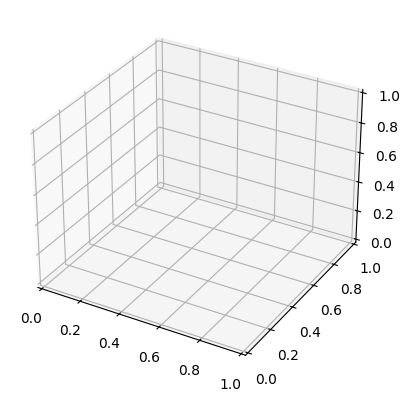

In [18]:
ax = plt.axes(projection='3d')


### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:

# Загрузка датасета
iris_dataset = load_iris()
iris_data = iris_dataset.data
iris_target = iris_dataset.target  # определяем iris_target

# Создание iris_dataset_1 и iris_dataset_2
iris_dataset_1 = np.delete(iris_data, 1, axis=1)  # удаляем sepal width (индекс 1)
iris_dataset_2 = np.delete(iris_data, 0, axis=1)  # удаляем sepal length (индекс 0)

# Разделение данных для iris_dataset_1
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    iris_dataset_1, iris_target, test_size=0.3, random_state=17
)

# Разделение данных для iris_dataset_2
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    iris_dataset_2, iris_target, test_size=0.3, random_state=17
)

# Создание и обучение моделей
knn_1 = KNeighborsClassifier(n_neighbors=5).fit(x_train_1, y_train_1)
knn_2 = KNeighborsClassifier(n_neighbors=5).fit(x_train_2, y_train_2)

# Оценка точности
print(f"Accuracy 1: {knn_1.score(x_test_1, y_test_1):.3f}")
print(f"Accuracy 2: {knn_2.score(x_test_2, y_test_2):.3f}")

Accuracy 1: 0.978
Accuracy 2: 0.978


### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.metrics import accuracy_score

# Предсказания для обеих моделей
y_pred_1 = knn_1.predict(x_test_1)
y_pred_2 = knn_2.predict(x_test_2)

# Расчет точности с помощью accuracy_score
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print(f'Accuracy_1: {accuracy_1:.3f}, Accuracy_2: {accuracy_2:.3f}')

Accuracy_1: 0.978, Accuracy_2: 0.978


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

k= 1: 0.978
k= 2: 0.978
k= 3: 0.978
k= 4: 0.956
k= 5: 0.978
k= 6: 0.956
k= 7: 0.956
k= 8: 0.933
k= 9: 0.956
k=10: 0.956
k=11: 0.978
k=12: 0.933
k=13: 0.956
k=14: 0.933
k=15: 0.978
k=16: 0.956
k=17: 0.956
k=18: 0.933
k=19: 0.933
k=20: 0.933

Лучший результат для iris_dataset_1:
n_neighbors = 1, Accuracy = 0.978


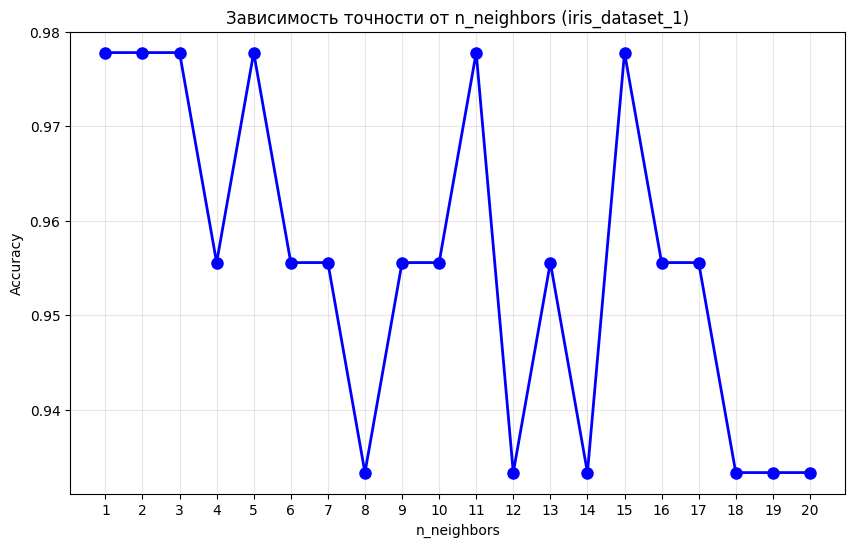

In [28]:
from sklearn.metrics import accuracy_score

# Списки для хранения результатов
k_values = list(range(1, 21))
accuracies_1 = []

# Перебираем значения n_neighbors
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(x_train_1, y_train_1)
    y_pred = knn.predict(x_test_1)
    accuracy = accuracy_score(y_test_1, y_pred)
    accuracies_1.append(accuracy)

    print(f"k={k:2d}: {accuracy:.3f}")

# Находим лучший результат
best_idx = np.argmax(accuracies_1)
best_k_1 = k_values[best_idx]
best_accuracy_1 = accuracies_1[best_idx]

print(f"\nЛучший результат для iris_dataset_1:")
print(f"n_neighbors = {best_k_1}, Accuracy = {best_accuracy_1:.3f}")

# Визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_1, 'bo-', linewidth=2, markersize=8)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Зависимость точности от n_neighbors (iris_dataset_1)')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()


In [29]:
#без графика
best_accuracy = 0
best_n = 0

for n in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=n)
    knn_temp.fit(x_train_1, y_train_1)
    y_pred_temp = knn_temp.predict(x_test_1)
    accuracy_temp = accuracy_score(y_test_1, y_pred_temp)

    print(f'n_neighbors = {n}: accuracy = {accuracy_temp:.3f}')

    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        best_n = n

print(f'\nЛучший результат: n_neighbors = {best_n}, accuracy = {best_accuracy:.3f}')

n_neighbors = 1: accuracy = 0.978
n_neighbors = 2: accuracy = 0.978
n_neighbors = 3: accuracy = 0.978
n_neighbors = 4: accuracy = 0.956
n_neighbors = 5: accuracy = 0.978
n_neighbors = 6: accuracy = 0.956
n_neighbors = 7: accuracy = 0.956
n_neighbors = 8: accuracy = 0.933
n_neighbors = 9: accuracy = 0.956
n_neighbors = 10: accuracy = 0.956
n_neighbors = 11: accuracy = 0.978
n_neighbors = 12: accuracy = 0.933
n_neighbors = 13: accuracy = 0.956
n_neighbors = 14: accuracy = 0.933
n_neighbors = 15: accuracy = 0.978
n_neighbors = 16: accuracy = 0.956
n_neighbors = 17: accuracy = 0.956
n_neighbors = 18: accuracy = 0.933
n_neighbors = 19: accuracy = 0.933
n_neighbors = 20: accuracy = 0.933

Лучший результат: n_neighbors = 1, accuracy = 0.978
